# Random Forest for ClimateWins

# Importing Libraries and Data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [70]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [71]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [72]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path,  'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [73]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [74]:
X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [75]:
X.shape

(22950, 137)

In [76]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [77]:
answers.shape

(22950, 16)

In [78]:
# Data wrangling

In [79]:
dfyear = X[X['DATE'].astype(str).str[:4] == '2020']
dfyear


DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
21915  20200101      1                  0            0.87          1.0339   
21916  20200102      1                  0            0.87          1.0316   
21917  20200103      1                  7            0.81          1.0287   
21918  20200104      1                  6            0.79          1.0341   
21919  20200105      1                  0            0.85          1.0367   
21920  20200106      1                  0            0.88          1.0307   
21921  20200107      1                  7            0.92          1.0320   
21922  20200108      1                  7            0.86          1.0314   
21923  20200109      1                  4            0.68          1.0224   
21924  20200110      1                  6            0.76          1.0247   
21925  20200111      1                  6            0.85          1.0335   
21926  20200112      1                  7            0.85          1.0308   
21927  20200113      1                  7            0.79          1.0234   
21928  20200114      1                  2            0.73          1.0191   
21929  20200115      1                  1            0.70          1.0226   
21930  20200116      1                  2            0.69          1.0275   
21931  20200117      1                  6            0.85          1.0236   
21932  20200118      1                  6            0.74          1.0293   
21933  20200119      1                  5            0.87          1.0371   
21934  20200120      1                  4            0.73          1.0431   
21935  20200121      1                  0            0.76          1.0407   
21936  20200122      1                  6            0.89          1.0362   
21937  20200123      1                  4            0.80          1.0310   
21938  20200124      1                  2            0.83          1.0259   
21939  20200125      1                  3            0.85          1.0231   
21940  20200126      1                  6            0.87          1.0209   
21941  20200127      1                  7            0.81          1.0144   
21942  20200128      1                  5            0.66          1.0067   
21943  20200129      1                  7            0.81          1.0161   
21944  20200130      1                  5            0.79          1.0171   
21945  20200131      1                  7            0.76          1.0167   
21946  20200201      2                  8            0.79          1.0149   
21947  20200202      2                  8            0.77          1.0173   
21948  20200203      2                  8            0.70          1.0179   
21949  20200204      2                  7            0.80          1.0199   
21950  20200205      2                  4            0.71          1.0345   
21951  20200206      2                  3            0.68          1.0327   
21952  20200207      2                  0            0.67          1.0276   
21953  20200208      2                  4            0.70          1.0259   
21954  20200209      2                  6            0.54          1.0198   
21955  20200210      2                  7            0.58          1.0104   
21956  20200211      2                  5            0.76          1.0169   
21957  20200212      2                  6            0.63          1.0230   
21958  20200213      2                  7            0.69          1.0135   
21959  20200214      2                  6            0.75          1.0243   
21960  20200215      2                  5            0.75          1.0246   
21961  20200216      2                  6            0.64          1.0184   
21962  20200217      2                  8            0.68          1.0214   
21963  20200218      2                  5            0.62          1.0298   
21964  20200219      2                  6            0.64          1.0261   
21965  20200220      2                  5            0.66          1.0235   
21966  

In [80]:
# Reduce answers to set decade

answers_year = answers[(answers['DATE'].astype(str).str[:4] == '2020')]
answers_year

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
21915  20200101                       0                          0   
21916  20200102                       0                          0   
21917  20200103                       0                          0   
21918  20200104                       0                          0   
21919  20200105                       0                          0   
21920  20200106                       0                          0   
21921  20200107                       0                          0   
21922  20200108                       0                          0   
21923  20200109                       0                          0   
21924  20200110                       0                          0   
21925  20200111                       0                          0   
21926  20200112                       0                          0   
21927  20200113                       0                          0   
21928  20200114                       0                          0   
21929  20200115                       0                          0   
21930  20200116                       0                          0   
21931  20200117                       0                          0   
21932  20200118                       0                          0   
21933  20200119                       0                          0   
21934  20200120                       0                          0   
21935  20200121                       0                          0   
21936  20200122                       0                          0   
21937  20200123                       0                          0   
21938  20200124                       0                          0   
21939  20200125                       0                          0   
21940  20200126                       0                          0   
21941  20200127                       0                          0   
21942  20200128                       0                          0   
21943  20200129                       0                          0   
21944  20200130                       0                          0   
21945  20200131                       0                          0   
21946  20200201                       0                          1   
21947  20200202                       0                          1   
21948  20200203                       0                          0   
21949  20200204                       0                          0   
21950  20200205                       0                          0   
21951  20200206                       0                          0   
21952  20200207                       0                          0   
21953  20200208                       0                          0   
21954  20200209                       0                          0   
21955  20200210                       0                          0   
21956  20200211                       0                          0   
21957  20200212                       0                          0   
21958  20200213                       0                          0   
21959  20200214                       0                          0   
21960  20200215                       0                          0   
21961  20200216                       0                          0   
21962  20200217                       0                          1   
21963  20200218                       0                          0   
21964  20200219                       0                          0   
21965  20200220                       0                          0   
21966  20200221                       0                          0   
21967  20200222                       0                          0   
21968  20200223                       0                          0   
21969  20200224                       1                          0   
21970  20200225                       0                          0   
21971  20200226      

In [81]:
# show all rows

pd.set_option('display.max_rows', None)

In [82]:
# extract stations

stations1 = [col.split('_')[0] for col in dfyear.columns if '_' in col]

In [83]:
# Create a list with unique stations

unique_stations1 = set(stations1)
unique_stations1

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [84]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies1 = {}

for station in unique_stations1:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfyear.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfyear[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies1.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:


In [85]:
# Drop unnecessary columns

dfyear.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [86]:
dfyear.shape # observations dataset has the correct shape

(366, 135)

In [87]:
answers_year.drop(columns = 'DATE', inplace = True)

In [88]:
answers_year.shape # check the shape, everything looks good

(366, 15)

In [89]:
X1 = dfyear

In [90]:
X1.shape

(366, 135)

In [91]:
y1=answers_year
y1.shape

(366, 15)

In [92]:
# Turn X and y from a df to arrays

X = np.array(X1)
y = np.array(y1)

In [93]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state = 42)

In [94]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(274, 135) (274, 15)
(92, 135) (92, 15)


In [95]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=7)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5434782608695652


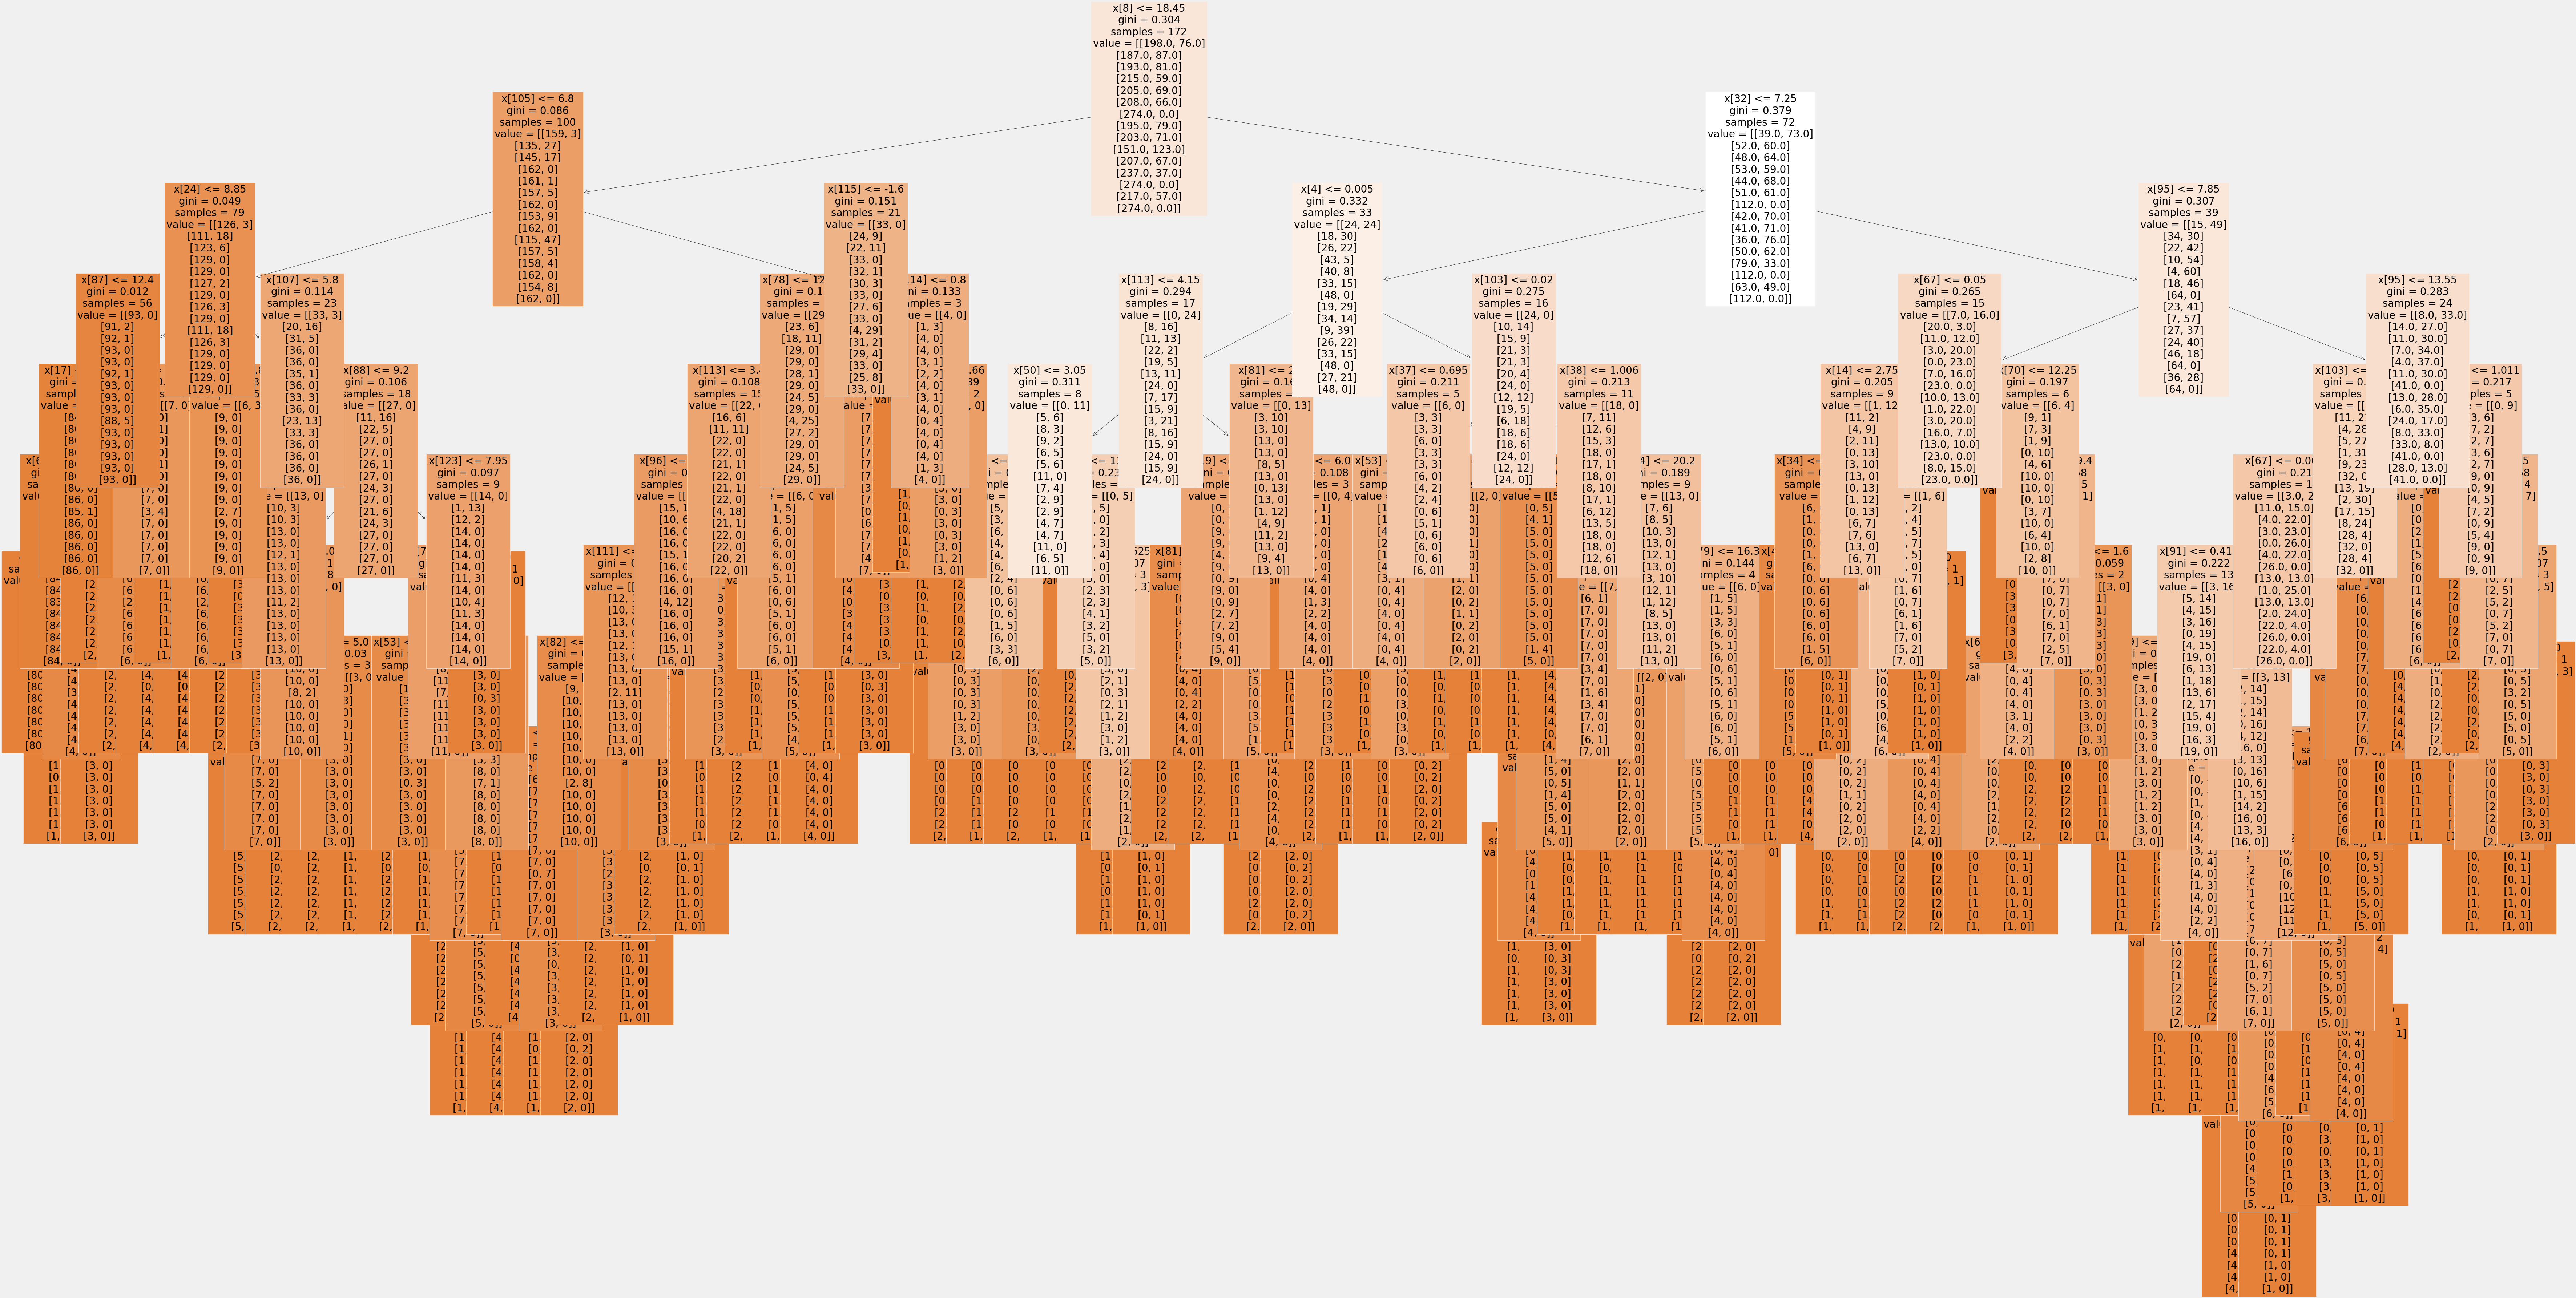

In [97]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [98]:
# Uncovering Feature Importances

In [99]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.00475111, 0.01079158, 0.00420769, 0.00523273, 0.00926271,
       0.01278632, 0.03424297, 0.00457185, 0.04342467, 0.0043549 ,
       0.        , 0.0066853 , 0.00124789, 0.0060737 , 0.0064744 ,
       0.00842505, 0.00521263, 0.0060646 , 0.        , 0.        ,
       0.        , 0.        , 0.01000116, 0.        , 0.01790867,
       0.01067512, 0.01613317, 0.00285098, 0.00550004, 0.00504097,
       0.01326946, 0.01152626, 0.01478019, 0.02632867, 0.00458725,
       0.0340547 , 0.00515435, 0.00580467, 0.00773685, 0.0126025 ,
       0.0151738 , 0.00639932, 0.00367877, 0.00467742, 0.02232057,
       0.00276278, 0.00708389, 0.00696756, 0.00564842, 0.00533543,
       0.0055884 , 0.01854445, 0.005172  , 0.02864297, 0.00330165,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00356499, 0.00405498,
       0.00583414, 0.00431996, 0.01379051, 0.00452227, 0.00985962,
       0.00430456, 0.01531064, 0.00587324, 0.01011347, 0.00870

In [100]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00475111, 0.01079158, 0.00420769, 0.00523273, 0.00926271,
         0.01278632, 0.03424297, 0.00457185, 0.04342467],
        [0.0043549 , 0.        , 0.0066853 , 0.00124789, 0.0060737 ,
         0.0064744 , 0.00842505, 0.00521263, 0.0060646 ],
        [0.        , 0.        , 0.        , 0.        , 0.01000116,
         0.        , 0.01790867, 0.01067512, 0.01613317],
        [0.00285098, 0.00550004, 0.00504097, 0.01326946, 0.01152626,
         0.01478019, 0.02632867, 0.00458725, 0.0340547 ],
        [0.00515435, 0.00580467, 0.00773685, 0.0126025 , 0.0151738 ,
         0.00639932, 0.00367877, 0.00467742, 0.02232057],
        [0.00276278, 0.00708389, 0.00696756, 0.00564842, 0.00533543,
         0.0055884 , 0.01854445, 0.005172  , 0.02864297],
        [0.00330165, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.00356499, 0.00405498, 0.00583414, 0.00431996, 0.01379051,
         0.00452227, 0.00985962, 0.0043045

In [101]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12927163, 0.04453847, 0.05471812, 0.11793852, 0.08354827,
       0.08574589, 0.00330165, 0.06556167, 0.11372428, 0.06308032,
       0.07958122, 0.06972553, 0.04236875, 0.04689569, 0.        ])

In [102]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [103]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

VALENTIA      0.129272
MAASTRICHT    0.117939
BELGRADE      0.113724
DEBILT        0.085746
SONNBLICK     0.083548
KASSEL        0.079581
MUNCHENB      0.069726
HEATHROW      0.065562
BASEL         0.063080
BUDAPEST      0.054718
LJUBLJANA     0.046896
MADRID        0.044538
OSLO          0.042369
STOCKHOLM     0.003302
DUSSELDORF    0.000000
dtype: float64

In [104]:
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['VALENTIA', 'MADRID', 'BUDAPEST', 'MAASTRICHT', 'SONNBLICK', 'DEBILT', 'STOCKHOLM', 'HEATHROW', 'BELGRADE', 'BASEL', 'KASSEL', 'MUNCHENB', 'OSLO', 'LJUBLJANA', 'DUSSELDORF']


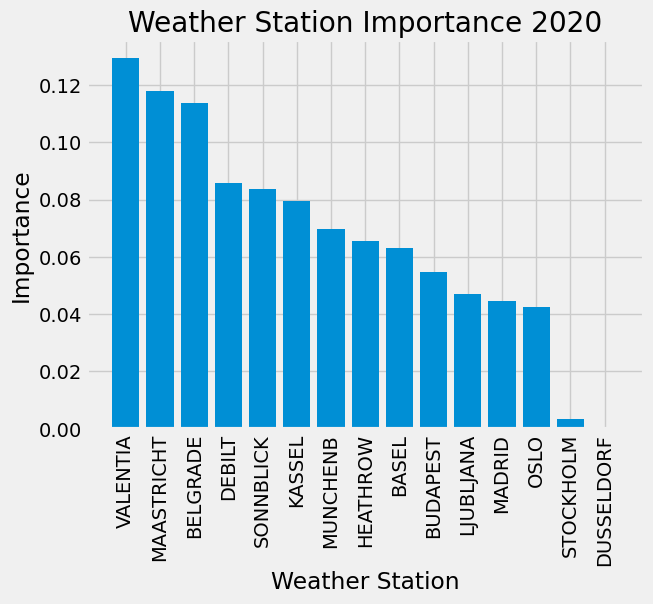

In [105]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2020')

plt.savefig(os.path.join(path, 'Visualizations', '2020_feature_importances.png'), bbox_inches='tight')

plt.show()